# CNN on MNIST dataset
*Graphing results for a CNN on the MNIST dataset*

# NOTE:
### Training the network is *significantly* faster while using high performance training on GPU with MacOS MPS (Metal Performance Shaders)
* Training with M2 Max CPU: 88 seconds
* Training with Google Colab T4 GPU: 39 seconds
* Training with M2 Max MPS enabled: 25 seconds

### Packages and Data Manipulation

In [90]:
import torch
import torchvision #this package includes many of the most popular datasets
import torchvision.transforms as transforms

import numpy as np

#plotting
import matplotlib.pyplot as plt

In [91]:
# load the data
batch_size = 128
batch_size = 32
data_path='./data'

dtype = torch.float
# for nvidia gpus with cuda cores
#device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# for apple m1 or m2 chips
device = torch.device("mps")


In [92]:
# Define a transform
transform = transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

mnist_train = torchvision.datasets.MNIST(root=data_path, train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root=data_path, train=False, download=True, transform=transform)

### Visualizations

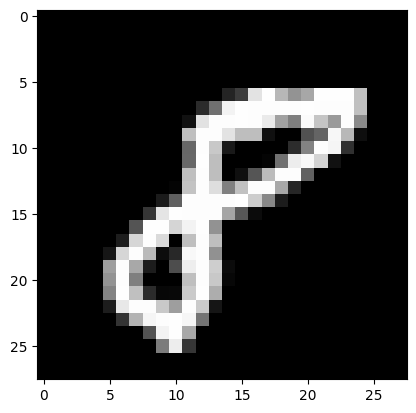

In [93]:
# visualizing data using dataloader

from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True, drop_last=True)

images, labels = next(iter(train_loader))
plt.imshow(images[0].reshape(28, 28), cmap="gray")

In [94]:
print(images.shape)
print(labels[0])

torch.Size([32, 1, 28, 28])
tensor(8)


In [95]:
print(mnist_train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=(0,), std=(1,))
           )


### Network Definition

In [96]:
# importing package
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # here are the layers
        
        # these are convolutional 2d layers. the numbers represent input, output, and kernel size, respectively
        # the kernel size is the size of the filter that is slided over the image, in this case, 3x3
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 24 * 24, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=36864, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [97]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Net Training

In [98]:
import time
start_time = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f} | time: {time.time() - start_time:.2f}s')
            running_loss = 0.0
end_time = time.time()  # Record end time
print('Finished Training')
print(f"Training took {end_time - start_time:.2f} seconds")

[1,    50] loss: 0.057 | time: 0.85s
[1,   100] loss: 0.050 | time: 1.36s
[1,   150] loss: 0.028 | time: 1.87s
[1,   200] loss: 0.014 | time: 2.37s
[1,   250] loss: 0.012 | time: 2.88s
[1,   300] loss: 0.010 | time: 3.38s
[1,   350] loss: 0.010 | time: 3.87s
[1,   400] loss: 0.010 | time: 4.38s
[1,   450] loss: 0.009 | time: 4.88s
[1,   500] loss: 0.010 | time: 5.38s
[1,   550] loss: 0.010 | time: 5.89s
[1,   600] loss: 0.007 | time: 6.38s
[1,   650] loss: 0.009 | time: 6.88s
[1,   700] loss: 0.008 | time: 7.39s
[1,   750] loss: 0.009 | time: 7.89s
[1,   800] loss: 0.009 | time: 8.39s
[1,   850] loss: 0.007 | time: 8.89s
[1,   900] loss: 0.007 | time: 9.39s
[1,   950] loss: 0.008 | time: 9.89s
[1,  1000] loss: 0.008 | time: 10.39s
[1,  1050] loss: 0.007 | time: 10.90s
[1,  1100] loss: 0.006 | time: 11.40s
[1,  1150] loss: 0.006 | time: 11.90s
[1,  1200] loss: 0.007 | time: 12.40s
[1,  1250] loss: 0.007 | time: 12.90s
[1,  1300] loss: 0.006 | time: 13.40s
[1,  1350] loss: 0.006 | time: 

In [108]:
# save model
PATH = './model/mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

In [109]:
# load model
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [110]:
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=36864, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### Accuracy Check

In [111]:
correct = 0
total = 0

with torch.no_grad():  # We don't need gradients for evaluation
    for data in test_loader:  # Assuming test_loader is your validation/test data loader
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        
        # Get the predicted class for each sample in the batch
        _, predicted = torch.max(outputs.data, 1)
        
        # Update total number of samples and number of correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {accuracy:.2f}%')


Accuracy of the network on the test images: 96.68%
